# DS-SF 07

In [1]:
import os

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

from sklearn import preprocessing, neighbors, model_selection

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [8]:
df = pd.read_csv(os.path.join('../datasets/storms.csv.gz'), compression='gzip')

In [9]:
df

,STATE__,BGN_DATE,BGN_TIME,TIME_ZONE,COUNTY,...,LONGITUDE,LATITUDE_E,LONGITUDE_,REMARKS,REFNUM
0,1.0,4/18/1950 0:00:00,130,CST,97.0,...,8812.0,3051.0,8806.0,NaN,1.0
1,1.0,4/18/1950 0:00:00,145,CST,3.0,...,8755.0,0.0,0.0,NaN,2.0
2,1.0,2/20/1951 0:00:00,1600,CST,57.0,...,8742.0,0.0,0.0,NaN,3.0
3,1.0,6/8/1951 0:00:00,900,CST,89.0,...,8626.0,0.0,0.0,NaN,4.0
4,1.0,11/15/1951 0:00:00,1500,CST,43.0,...,8642.0,0.0,0.0,NaN,5.0
...,...,...,...,...,...,...,...,...,...,...,...
902292,56.0,11/30/2011 0:00:00,10:30:00 PM,MST,7.0,...,0.0,0.0,0.0,EPISODE NARRATIVE: A strong cold front moved s...,902293.0
902293,30.0,11/10/2011 0:00:00,02:48:00 PM,MST,9.0,...,0.0,0.0,0.0,EPISODE NARRATIVE: A strong westerly flow alof...,902294.0
902294,2.0,11/8/2011 0:00:00,02:58:00 PM,AKS,213.0,...,0.0,0.0,0.0,EPISODE NARRATIVE: A 960 mb low over the south...,902295.0
902295,2.0,11/9/2011 0:00:00,10:21:00 AM,AKS,202.0,...,0.0,0.0,0.0,EPISODE NARRATIVE: A 960 mb low over the south...,902296.0


In [10]:
df.shape[0]

902297

In [11]:
len(df)

902297

In [12]:
df.shape[1] 

37

In [13]:
for column in df.columns:
    print column

STATE__
BGN_DATE
BGN_TIME
TIME_ZONE
COUNTY
COUNTYNAME
STATE
EVTYPE
BGN_RANGE
BGN_AZI
BGN_LOCATI
END_DATE
END_TIME
COUNTY_END
COUNTYENDN
END_RANGE
END_AZI
END_LOCATI
LENGTH
WIDTH
F
MAG
FATALITIES
INJURIES
PROPDMG
PROPDMGEXP
CROPDMG
CROPDMGEXP
WFO
STATEOFFIC
ZONENAMES
LATITUDE
LONGITUDE
LATITUDE_E
LONGITUDE_
REMARKS
REFNUM


In [14]:
df[:2]

,STATE__,BGN_DATE,BGN_TIME,TIME_ZONE,COUNTY,...,LONGITUDE,LATITUDE_E,LONGITUDE_,REMARKS,REFNUM
0,1.0,4/18/1950 0:00:00,130,CST,97.0,...,8812.0,3051.0,8806.0,NaN,1.0
1,1.0,4/18/1950 0:00:00,145,CST,3.0,...,8755.0,0.0,0.0,NaN,2.0


In [15]:
df.corr()

,STATE__,COUNTY,BGN_RANGE,COUNTY_END,COUNTYENDN,...,LATITUDE,LONGITUDE,LATITUDE_E,LONGITUDE_,REFNUM
STATE__,1.000000,0.306231,0.045905,NaN,NaN,...,-0.006642,-0.024199,-0.029509,-0.039056,0.090742
COUNTY,0.306231,1.000000,0.054419,NaN,NaN,...,0.034407,0.097044,0.007791,0.032864,0.017981
BGN_RANGE,0.045905,0.054419,1.000000,NaN,NaN,...,0.071263,0.089530,0.111696,0.123731,0.115187
COUNTY_END,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
COUNTYENDN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
LATITUDE,-0.006642,0.034407,0.071263,NaN,NaN,...,1.000000,0.950481,0.450664,0.425717,0.023350
LONGITUDE,-0.024199,0.097044,0.089530,NaN,NaN,...,0.950481,1.000000,0.431528,0.450961,-0.001322
LATITUDE_E,-0.029509,0.007791,0.111696,NaN,NaN,...,0.450664,0.431528,1.000000,0.980109,0.105456
LONGITUDE_,-0.039056,0.032864,0.123731,NaN,NaN,...,0.425717,0.450961,0.980109,1.000000,0.102480


In [16]:
df.head()

,STATE__,BGN_DATE,BGN_TIME,TIME_ZONE,COUNTY,...,LONGITUDE,LATITUDE_E,LONGITUDE_,REMARKS,REFNUM
0,1.0,4/18/1950 0:00:00,130,CST,97.0,...,8812.0,3051.0,8806.0,NaN,1.0
1,1.0,4/18/1950 0:00:00,145,CST,3.0,...,8755.0,0.0,0.0,NaN,2.0
2,1.0,2/20/1951 0:00:00,1600,CST,57.0,...,8742.0,0.0,0.0,NaN,3.0
3,1.0,6/8/1951 0:00:00,900,CST,89.0,...,8626.0,0.0,0.0,NaN,4.0
4,1.0,11/15/1951 0:00:00,1500,CST,43.0,...,8642.0,0.0,0.0,NaN,5.0


In [18]:
df.describe

<bound method DataFrame.describe of         STATE__            BGN_DATE     BGN_TIME TIME_ZONE  COUNTY    ...     \
0           1.0   4/18/1950 0:00:00          130       CST    97.0    ...      
1           1.0   4/18/1950 0:00:00          145       CST     3.0    ...      
2           1.0   2/20/1951 0:00:00         1600       CST    57.0    ...      
3           1.0    6/8/1951 0:00:00          900       CST    89.0    ...      
4           1.0  11/15/1951 0:00:00         1500       CST    43.0    ...      
...         ...                 ...          ...       ...     ...    ...      
902292     56.0  11/30/2011 0:00:00  10:30:00 PM       MST     7.0    ...      
902293     30.0  11/10/2011 0:00:00  02:48:00 PM       MST     9.0    ...      
902294      2.0   11/8/2011 0:00:00  02:58:00 PM       AKS   213.0    ...      
902295      2.0   11/9/2011 0:00:00  10:21:00 AM       AKS   202.0    ...      
902296      1.0  11/28/2011 0:00:00  08:00:00 PM       CST     6.0    ...      

   

In [20]:
df_original = df.copy() # copy data before doing anything to it

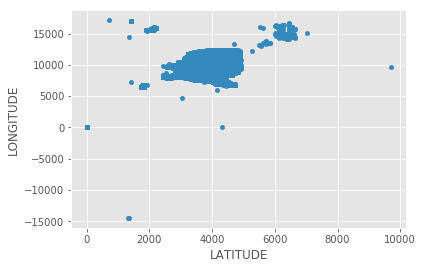

In [22]:
df.plot(kind='scatter', x='LATITUDE', y='LONGITUDE')

## Events 
Look at the type of events first, clean up the data compared to the official list

In [23]:
df.EVTYPE.unique()

array(['TORNADO', 'TSTM WIND', 'HAIL', 'FREEZING RAIN', 'SNOW',
       'ICE STORM/FLASH FLOOD', 'SNOW/ICE', 'WINTER STORM',
       'HURRICANE OPAL/HIGH WINDS', 'THUNDERSTORM WINDS', 'RECORD COLD',
       'HURRICANE ERIN', 'HURRICANE OPAL', 'HEAVY RAIN', 'LIGHTNING',
       'THUNDERSTORM WIND', 'DENSE FOG', 'RIP CURRENT',
       'THUNDERSTORM WINS', 'FLASH FLOOD', 'FLASH FLOODING', 'HIGH WINDS',
       'FUNNEL CLOUD', 'TORNADO F0', 'THUNDERSTORM WINDS LIGHTNING',
       'THUNDERSTORM WINDS/HAIL', 'HEAT', 'WIND', 'LIGHTING',
       'HEAVY RAINS', 'LIGHTNING AND HEAVY RAIN', 'FUNNEL', 'WALL CLOUD',
       'FLOODING', 'THUNDERSTORM WINDS HAIL', 'FLOOD', 'COLD',
       'HEAVY RAIN/LIGHTNING', 'FLASH FLOODING/THUNDERSTORM WI',
       'WALL CLOUD/FUNNEL CLOUD', 'THUNDERSTORM', 'WATERSPOUT',
       'EXTREME COLD', 'HAIL 1.75)', 'LIGHTNING/HEAVY RAIN', 'HIGH WIND',
       'BLIZZARD', 'BLIZZARD WEATHER', 'WIND CHILL', 'BREAKUP FLOODING',
       'HIGH WIND/BLIZZARD', 'RIVER FLOOD', 'HEAVY SNOW', 

In [37]:
df.groupby(["EVTYPE"]).size()

EVTYPE
   HIGH SURF ADVISORY    1
 COASTAL FLOOD           1
 FLASH FLOOD             1
 LIGHTNING               1
 TSTM WIND               4
                        ..
blowing snow             2
coastal flooding         2
gradient wind            2
small hail               5
wet micoburst            1
Length: 985, dtype: int64

In [29]:
df.groupby(["EVTYPE"])

In [43]:
df.EVTYPE.value_counts()

HAIL                              288661
TSTM WIND                         219940
THUNDERSTORM WIND                  82563
TORNADO                            60652
FLASH FLOOD                        54277
                                   ...  
EXCESSIVE                              1
LANDSLUMP                              1
NORTHERN LIGHTS                        1
HURRICANE EMILY                        1
THUNDERSTORM WINDS/FLASH FLOOD         1
Name: EVTYPE, Length: 985, dtype: int64

In [44]:
type(df.EVTYPE.value_counts()) # 

pandas.core.series.Series

Now, I want to only show a certain index of these, only show the EVTYPE in storm data table 2.1.1... I think I use `loc()` here

In [45]:
official_event_types = [
    'Astronomical Low Tide', 'Avalanche',
    'Blizzard', 'Coastal Flood', 'Cold/Wind Chill', 'Debris Flow',
    'Dense Fog', 'Dense Smoke', 'Drought', 'Dust Devil', 'Dust Storm',
    'Excessive Heat', 'Extreme Cold/Wind Chill', 'Flash Flood', 'Flood',
    'Frost/Freeze', 'Funnel Cloud', 'Freezing Fog', 'Hail', 'Heat',
    'Heavy Rain', 'Heavy Snow', 'High Surf', 'High Wind',
    'Hurricane (Typhoon)', 'Ice Storm', 'Lake-Effect Snow',
    'Lakeshore Flood', 'Lightning', 'Marine Hail', 'Marine High Wind',
    'Marine Strong Wind', 'Marine Thunderstorm Wind', 'Rip Current',
    'Seiche', 'Sleet', 'Storm Surge/Tide', 'Strong Wind',
    'Thunderstorm Wind', 'Tornado', 'Tropical Depression',
    'Tropical Storm', 'Tsunami', 'Volcanic Ash', 'Waterspout', 'Wildfire',
    'Winter Storm', 'Winter Weather',
   'OTHER'
]

Note: don't'need to redefine df, just keep cleaning it - Ivan

In [50]:
df_2 = df[df['EVTYPE'].isin(official_event_types)]

In [51]:
df_2

,STATE__,BGN_DATE,BGN_TIME,TIME_ZONE,COUNTY,...,LONGITUDE,LATITUDE_E,LONGITUDE_,REMARKS,REFNUM


Everything in the table is upper case, so need to convert the reference list to all uppercase

In [53]:
official_event_types = [x.upper() for x in official_event_types]

In [54]:
official_event_types

['ASTRONOMICAL LOW TIDE',
 'AVALANCHE',
 'BLIZZARD',
 'COASTAL FLOOD',
 'COLD/WIND CHILL',
 'DEBRIS FLOW',
 'DENSE FOG',
 'DENSE SMOKE',
 'DROUGHT',
 'DUST DEVIL',
 'DUST STORM',
 'EXCESSIVE HEAT',
 'EXTREME COLD/WIND CHILL',
 'FLASH FLOOD',
 'FLOOD',
 'FROST/FREEZE',
 'FUNNEL CLOUD',
 'FREEZING FOG',
 'HAIL',
 'HEAT',
 'HEAVY RAIN',
 'HEAVY SNOW',
 'HIGH SURF',
 'HIGH WIND',
 'HURRICANE (TYPHOON)',
 'ICE STORM',
 'LAKE-EFFECT SNOW',
 'LAKESHORE FLOOD',
 'LIGHTNING',
 'MARINE HAIL',
 'MARINE HIGH WIND',
 'MARINE STRONG WIND',
 'MARINE THUNDERSTORM WIND',
 'RIP CURRENT',
 'SEICHE',
 'SLEET',
 'STORM SURGE/TIDE',
 'STRONG WIND',
 'THUNDERSTORM WIND',
 'TORNADO',
 'TROPICAL DEPRESSION',
 'TROPICAL STORM',
 'TSUNAMI',
 'VOLCANIC ASH',
 'WATERSPOUT',
 'WILDFIRE',
 'WINTER STORM',
 'WINTER WEATHER',
 'OTHER']

In [89]:
# Convert everything to upper case in the df
# https://stackoverflow.com/questions/31269216/applying-uppercase-to-a-column-in-pandas-dataframe
df_events_up = map(lambda x:x.upper(), df)

df["EVTYPE"] = df["EVTYPE"].apply(lambda string: string.upper())

/Users/andrewyu/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [91]:
df

,STATE__,BGN_DATE,BGN_TIME,TIME_ZONE,COUNTY,...,LONGITUDE,LATITUDE_E,LONGITUDE_,REMARKS,REFNUM
0,1.0,4/18/1950 0:00:00,130,CST,97.0,...,8812.0,3051.0,8806.0,NaN,1.0
1,1.0,4/18/1950 0:00:00,145,CST,3.0,...,8755.0,0.0,0.0,NaN,2.0
2,1.0,2/20/1951 0:00:00,1600,CST,57.0,...,8742.0,0.0,0.0,NaN,3.0
3,1.0,6/8/1951 0:00:00,900,CST,89.0,...,8626.0,0.0,0.0,NaN,4.0
4,1.0,11/15/1951 0:00:00,1500,CST,43.0,...,8642.0,0.0,0.0,NaN,5.0
...,...,...,...,...,...,...,...,...,...,...,...
902292,56.0,11/30/2011 0:00:00,10:30:00 PM,MST,7.0,...,0.0,0.0,0.0,EPISODE NARRATIVE: A strong cold front moved s...,902293.0
902293,30.0,11/10/2011 0:00:00,02:48:00 PM,MST,9.0,...,0.0,0.0,0.0,EPISODE NARRATIVE: A strong westerly flow alof...,902294.0
902294,2.0,11/8/2011 0:00:00,02:58:00 PM,AKS,213.0,...,0.0,0.0,0.0,EPISODE NARRATIVE: A 960 mb low over the south...,902295.0
902295,2.0,11/9/2011 0:00:00,10:21:00 AM,AKS,202.0,...,0.0,0.0,0.0,EPISODE NARRATIVE: A 960 mb low over the south...,902296.0


In [92]:
df_events_subset = df[df['EVTYPE'].isin(official_event_types)]

In [93]:
df_events_subset

,STATE__,BGN_DATE,BGN_TIME,TIME_ZONE,COUNTY,...,LONGITUDE,LATITUDE_E,LONGITUDE_,REMARKS,REFNUM
0,1.0,4/18/1950 0:00:00,130,CST,97.0,...,8812.0,3051.0,8806.0,NaN,1.0
1,1.0,4/18/1950 0:00:00,145,CST,3.0,...,8755.0,0.0,0.0,NaN,2.0
2,1.0,2/20/1951 0:00:00,1600,CST,57.0,...,8742.0,0.0,0.0,NaN,3.0
3,1.0,6/8/1951 0:00:00,900,CST,89.0,...,8626.0,0.0,0.0,NaN,4.0
4,1.0,11/15/1951 0:00:00,1500,CST,43.0,...,8642.0,0.0,0.0,NaN,5.0
...,...,...,...,...,...,...,...,...,...,...,...
902292,56.0,11/30/2011 0:00:00,10:30:00 PM,MST,7.0,...,0.0,0.0,0.0,EPISODE NARRATIVE: A strong cold front moved s...,902293.0
902293,30.0,11/10/2011 0:00:00,02:48:00 PM,MST,9.0,...,0.0,0.0,0.0,EPISODE NARRATIVE: A strong westerly flow alof...,902294.0
902294,2.0,11/8/2011 0:00:00,02:58:00 PM,AKS,213.0,...,0.0,0.0,0.0,EPISODE NARRATIVE: A 960 mb low over the south...,902295.0
902295,2.0,11/9/2011 0:00:00,10:21:00 AM,AKS,202.0,...,0.0,0.0,0.0,EPISODE NARRATIVE: A 960 mb low over the south...,902296.0


In [94]:
df.shape, df_events_subset.shape

((902176, 37), (635282, 37))

### Note:
At this point ask yourself, is this good enough? Is this df good enough to work with? What can I say about event types



In [95]:
df_events_subset.EVTYPE.value_counts()

HAIL                 288661
THUNDERSTORM WIND     82563
TORNADO               60652
FLASH FLOOD           54277
FLOOD                 25326
                      ...  
VOLCANIC ASH             22
SEICHE                   21
TSUNAMI                  20
DENSE SMOKE              10
OTHER                     4
Name: EVTYPE, Length: 47, dtype: int64

In [96]:
len(official_event_types)

49

### Note:
Initially, the 46, 49 difference caught me off guard, but since I did an `isin()` there are some rows that just arent in the data set for the official event types

In [76]:
sorted_events = df_events_subset.EVTYPE.value_counts() # get an ordered list of types

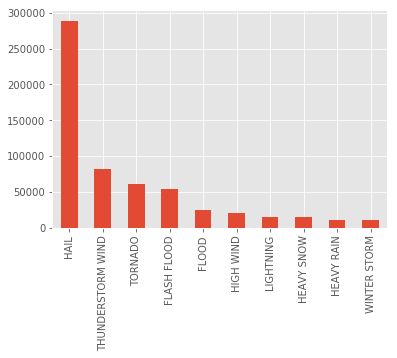

In [79]:
sorted_events = sorted_events.head(10)
sorted_events.plot(kind='bar')

## Damages


In [69]:

list(df)

['STATE__',
 'BGN_DATE',
 'BGN_TIME',
 'TIME_ZONE',
 'COUNTY',
 'COUNTYNAME',
 'STATE',
 'EVTYPE',
 'BGN_RANGE',
 'BGN_AZI',
 'BGN_LOCATI',
 'END_DATE',
 'END_TIME',
 'COUNTY_END',
 'COUNTYENDN',
 'END_RANGE',
 'END_AZI',
 'END_LOCATI',
 'LENGTH',
 'WIDTH',
 'F',
 'MAG',
 'FATALITIES',
 'INJURIES',
 'PROPDMG',
 'PROPDMGEXP',
 'CROPDMG',
 'CROPDMGEXP',
 'WFO',
 'STATEOFFIC',
 'ZONENAMES',
 'LATITUDE',
 'LONGITUDE',
 'LATITUDE_E',
 'LONGITUDE_',
 'REMARKS',
 'REFNUM']

In [97]:
df.CROPDMG.value_counts()

0.00      880108
5.00        4276
10.00       2381
50.00       2011
1.00        1404
           ...  
290.00         1
73.00          1
2.90           1
1.35           1
1.12           1
Name: CROPDMG, Length: 431, dtype: int64

In [98]:
df.PROPDMG.value_counts()

0.00      663018
5.00       32653
10.00      22017
1.00       19067
2.00       17872
           ...  
859.00         1
299.88         1
363.00         1
29.96          1
5.13           1
Name: PROPDMG, Length: 1389, dtype: int64

In [99]:
df.PROPDMG.unique()

array([  25. ,    2.5,  250. , ...,  164.8,  181. ,   43.5])

In [100]:
df[PROPDMG.max()]

NameError: name 'PROPDMG' is not defined

### Notes 
Normalize the damage prices for the prop damage
Thousands, millions, billions
Put everything into dollars


In [102]:
df.PROPDMGEXP.unique()

array(['K', 'M', nan, 'B', 'm', '+', '0', '5', '6', '?', '4', '2', '3',
       'h', '7', 'H', '-', '1', '8'], dtype=object)

In [103]:
df.CROPDMGEXP.unique()

array([nan, 'M', 'K', 'm', 'B', '?', '0', 'k', '2'], dtype=object)

In [105]:
# df.SalePrice *= df.SalePriceUnit.map({'$': 1. / (10 ** 6), '$M': 1.})

In [106]:
# Thousands to regular dollars
df_K = df[df.CROPDMGEXP == 'K']


,STATE__,BGN_DATE,BGN_TIME,TIME_ZONE,COUNTY,...,LONGITUDE,LATITUDE_E,LONGITUDE_,REMARKS,REFNUM
187570,1.0,6/26/1994 0:00:00,2025,CST,83.0,...,0.0,0.0,0.0,,188271.0
187652,1.0,3/24/1994 0:00:00,1410,CST,7.0,...,0.0,0.0,0.0,A mobile home in the Brent area was destroyed ...,187640.0
187653,1.0,3/24/1994 0:00:00,1425,CST,7.0,...,0.0,0.0,0.0,A mobile home in the Brent area was destroyed ...,187641.0
187679,1.0,11/28/1994 0:00:00,30,CST,9.0,...,8634.0,0.0,0.0,A tornado produced a damage path 1.6 miles in ...,187667.0
187722,1.0,3/24/1994 0:00:00,1804,CST,17.0,...,0.0,0.0,0.0,"A barn was demolished, a roof blown off a porc...",187710.0
...,...,...,...,...,...,...,...,...,...,...,...
902292,56.0,11/30/2011 0:00:00,10:30:00 PM,MST,7.0,...,0.0,0.0,0.0,EPISODE NARRATIVE: A strong cold front moved s...,902293.0
902293,30.0,11/10/2011 0:00:00,02:48:00 PM,MST,9.0,...,0.0,0.0,0.0,EPISODE NARRATIVE: A strong westerly flow alof...,902294.0
902294,2.0,11/8/2011 0:00:00,02:58:00 PM,AKS,213.0,...,0.0,0.0,0.0,EPISODE NARRATIVE: A 960 mb low over the south...,902295.0
902295,2.0,11/9/2011 0:00:00,10:21:00 AM,AKS,202.0,...,0.0,0.0,0.0,EPISODE NARRATIVE: A 960 mb low over the south...,902296.0


## 9:00 stop and discussion

* Damage: There were events where no damage happened
* Determine what rows you can get rid of first, so you don't have to clean rows you're gonna end up getting rid of anyway
* Its like a cycle, clean a little, plot, learn, bit by bit
* Cleaning itself takes a nuts amount
* *C